<a href="https://colab.research.google.com/github/Jahnavi-232/MyRep1/blob/main/Welcome_to_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [94]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import pandas as pd
from sklearn import preprocessing

In [95]:
regression_type= 'LASSO'

In [96]:
hp=pd.read_csv('/content/train.csv')
hp.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [97]:
hp_arr=hp[['YearBuilt','SalePrice']].to_numpy().astype('float64')
hp_arr[:5]

array([[  2003., 208500.],
       [  1976., 181500.],
       [  2001., 223500.],
       [  1915., 140000.],
       [  2000., 250000.]])

In [98]:
x_vals=np.array([x[0] for x in hp_arr]).reshape(-1,1)
y_vals=np.array([y[1] for y in hp_arr]).reshape(-1,1)

In [99]:
print(x_vals[:10])
print(x_vals.shape)

[[2003.]
 [1976.]
 [2001.]
 [1915.]
 [2000.]
 [1993.]
 [2004.]
 [1973.]
 [1931.]
 [1939.]]
(1460, 1)


In [100]:
print(y_vals[:10])
print(y_vals.shape)

[[208500.]
 [181500.]
 [223500.]
 [140000.]
 [250000.]
 [143000.]
 [307000.]
 [200000.]
 [129900.]
 [118000.]]
(1460, 1)


In [101]:
x_scaler = preprocessing.MinMaxScaler()
y_scaler = preprocessing.MinMaxScaler()
x_scaled = x_scaler.fit_transform(x_vals)


In [102]:
print(x_scaled[:10])
print(x_scaled.shape)

[[0.94927536]
 [0.75362319]
 [0.93478261]
 [0.3115942 ]
 [0.92753623]
 [0.87681159]
 [0.95652174]
 [0.73188406]
 [0.42753623]
 [0.48550725]]
(1460, 1)


In [103]:
y_scaled = y_scaler.fit_transform(y_vals)
y_scaled[:10]
y_scaled.shape


(1460, 1)

In [104]:
print(y_scaled[:10])
print(y_scaled.shape)

[[0.24107763]
 [0.20358284]
 [0.26190807]
 [0.14595195]
 [0.29870851]
 [0.15011804]
 [0.37786419]
 [0.22927371]
 [0.13192612]
 [0.11540064]]
(1460, 1)


In [105]:
x_scaled = x_scaled.flatten()
print(x_scaled[:10])
print(x_scaled.shape)


[0.94927536 0.75362319 0.93478261 0.3115942  0.92753623 0.87681159
 0.95652174 0.73188406 0.42753623 0.48550725]
(1460,)


In [106]:
y_scaled = y_scaled.flatten()
print(y_scaled[:10])
print(y_scaled.shape)



[0.24107763 0.20358284 0.26190807 0.14595195 0.29870851 0.15011804
 0.37786419 0.22927371 0.13192612 0.11540064]
(1460,)


In [107]:
batch_size=50

In [108]:
seed=13
np.random.seed(seed)
tf.random.set_seed(seed)

In [109]:
A=tf.Variable(tf.random.normal(shape=[1,1]),dtype='float32')
B=tf.Variable(tf.random.normal(shape=[1,1]),dtype='float32')
print("A=",A.numpy())
print("B=",B.numpy())

A= [[0.46733698]]
B= [[-1.0572089]]


In [120]:
def lasso_loss(y,o,a):
  y = tf.cast(y, dtype=tf.float64)
  o = tf.cast(o, dtype=tf.float64)
  lasso_param=tf.constant(0.9,dtype='float64')
  heavyside_step=tf.math.truediv(tf.constant(1.0, dtype=tf.float64),tf.math.add(tf.constant(1.0, dtype=tf.float64),tf.math.exp(tf.math.multiply(tf.constant(-3.0, dtype=tf.float64),tf.math.subtract(y,o)))))
  regularization_param=tf.multiply(heavyside_step,tf.constant(99., dtype=tf.float64))
  loss=tf.math.add(tf.math.reduce_mean(tf.square(y - o)),tf.reduce_mean(regularization_param))
  return loss

In [121]:
def ridege_loss(y,o,a):
  ridge_param=tf.constant(1.,dtype='float64')
  ridge_loss=tf.reduce_mean(tf.square(a))
  loss=tf.add(tf.reduce_mean(tf.square(y - o)),tf.multiply(ridge_param,ridge_loss))
  return loss

In [122]:
my_opt=tf.keras.optimizers.SGD(0.001)

In [125]:
loss_vec=[]
for i in range(3000):
  rand_index=np.random.choice(len(x_vals),size=batch_size)
  rand_x=np.transpose([x_scaled[rand_index]])
  rand_y=np.transpose([y_scaled[rand_index]])
  with tf.GradientTape() as tape:
    model_output=tf.math.add(tf.matmul(tf.cast(rand_x, tf.float32),A),B)
    if regression_type=='LASSO':
      loss=lasso_loss(rand_y,model_output,A)
    else:
      loss=ridege_loss(rand_y,model_output,A)
  grads=tape.gradient(loss,[A,B])
  my_opt.apply_gradients(zip(grads,[A,B]))
  loss_vec.append(loss.numpy())
  if (i+1)%500==0:
    print('Step #' + str(i+1) + ' A = ' + str(A.numpy()) + ' B = ' + str(B.numpy()))
    print('Loss ='+str(loss.numpy()))
    print('\n')

Step #500 A = [[0.27425075]] B = [[1.538887]]
Loss =3.3681118850034464


Step #1000 A = [[0.27608612]] B = [[1.5387795]]
Loss =3.3681737597918175


Step #1500 A = [[0.27494046]] B = [[1.5360751]]
Loss =3.3754101490040638


Step #2000 A = [[0.2764075]] B = [[1.5369314]]
Loss =3.3824172843471727


Step #2500 A = [[0.27809986]] B = [[1.5387312]]
Loss =3.3946265890362746


Step #3000 A = [[0.27596194]] B = [[1.5367538]]
Loss =3.417313860829238




In [126]:
slope=A.numpy()[0][0]
y_intercept=B.numpy()[0][0]
print('Slope = ' + str(slope))
print('Y-intercept = ' + str(y_intercept))

Slope = 0.27596194
Y-intercept = 1.5367538


In [128]:
best_fit = []

for i in x_scaled:

  best_fit.append(slope*i+y_intercept)


In [130]:
pred = np.array(best_fit)

pred[:10]


array([1.79871764, 1.74472509, 1.79471819, 1.62274191, 1.79271847,
       1.7787204 , 1.80071736, 1.73872591, 1.6547375 , 1.67073529])

In [133]:
pred=y_scaler.inverse_transform(pred.reshape(-1,1))

pred = pred.flatten()

pred[:10]

array([1330156.5725758 , 1291276.53544727, 1327276.56982554,
       1203436.45156428, 1325836.56845041, 1315756.55882449,
       1331596.57395093, 1286956.53132187, 1226476.47356637,
       1237996.48456742])

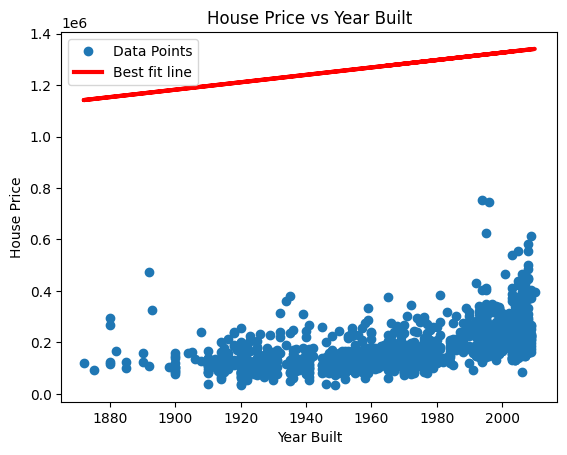

In [135]:
#Plot regression e against data points

plt.plot(x_vals, y_vals, 'o', label='Data Points')

plt.plot(x_vals, pred, 'r', label='Best fit line', linewidth=3)

plt.legend (loc='upper left')

plt.title('House Price vs Year Built')

plt.xlabel('Year Built')

plt.ylabel('House Price')

plt.show()

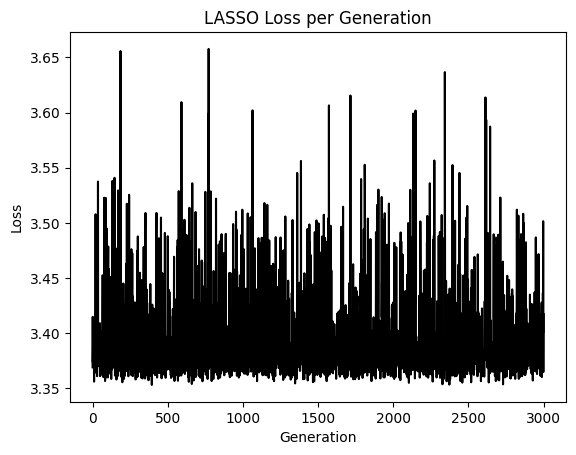

In [137]:
# Plot Loss over time

plt.plot(loss_vec, 'k-')

plt.title(regression_type +' Loss per Generation')

plt.xlabel('Generation')

plt.ylabel('Loss')

plt.show()